# Respuesta fisiológica al esfuerzo físico de la marcha

## Importar paquetes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Preguntar por directorio activo y archivos de datos CSV

In [4]:
#Preguntar a Python cuál es el directorio en el cual se ubica esta hoja de cálculo, y cuáles son los archivos con datos .csv que se encuentran en este directorio. 
import os
cwd = os.getcwd() # directorio actual
print(cwd) # imprimir directorio actual

for file in os.listdir():
    if file.endswith(".csv"):
        print(os.path.join(file)) # imprimir todos los archivos con terminación xlsx

C:\Users\jp23m\Documents\Fac ciencias\Analisis y medición\Rotación 2\Marcha
2018_04_02-11_56_36_Accel JP.csv
2018_04_02-11_56_36_Summary JP.csv
2018_04_04-11_58_12_Accel fer.csv
2018_04_04-11_58_12_Summary fer.csv
2018_04_11-09_45_44_Accel Val.csv
2018_04_11-09_45_44_Summary Val.csv
Fernanda (2018-04-04)RAW.csv
Juan Pablo (2018-04-02)RAW.csv
my_iOS_device fer.csv
my_iOS_device JP.csv
my_iOS_device Val.csv
Valentina (2018-04-11)RAW.csv


## Importar datos del archivo de resumen

El archivo de resumen contiene todas las variables, pero con una frecuencia de muestreo menor (1 dato/seg), mientras que los datos "crudos" originales vienen con una frecuencia de muestreo mayor, p.ej. ECG (250/s), acelerometría triaxial (100/s), etc.

In [28]:
Datos = np.loadtxt("2018_04_02-11_56_36_Summary JP.csv", delimiter=",",skiprows=1,usecols=range(1,34))
print(len(Datos))
print(Datos.shape)
print(Datos)

3437
(3437, 33)
[[ 6.5000e+01  8.1000e+00 -3.2768e+03 ...  6.5535e+03  4.1400e+02
   4.2000e+02]
 [ 6.5000e+01  8.1000e+00 -3.2768e+03 ...  6.5535e+03  4.1000e+02
   4.1600e+02]
 [ 6.5000e+01  7.3000e+00 -3.2768e+03 ...  6.5535e+03  4.1300e+02
   4.2000e+02]
 ...
 [ 5.3000e+01  1.4000e+00 -3.2768e+03 ...  3.7600e+01  4.1600e+02
   4.1900e+02]
 [ 5.1000e+01  1.4000e+00 -3.2768e+03 ...  3.7600e+01  4.1400e+02
   4.1900e+02]
 [ 5.1000e+01  1.7000e+00 -3.2768e+03 ...  3.7600e+01  4.1600e+02
   4.2000e+02]]


## Localizar fragmento de la marcha

Aquí se grafica la serie de tiempo completa de la aceleración maximal (PeakAcc). Buscamos los tiempos de inicio tMin y finl tMax de la marcha. Los 10min antes y después de la marcha corresponden con los periodos de reposo de pie. 

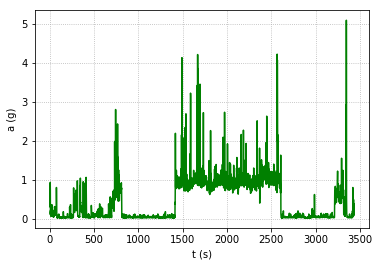

In [29]:
# Aceleración maximal (peak acceleration a)
# se mide en unidades del constante gravitacional g
Acc=Datos[:,5];
plt.plot(Acc,'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

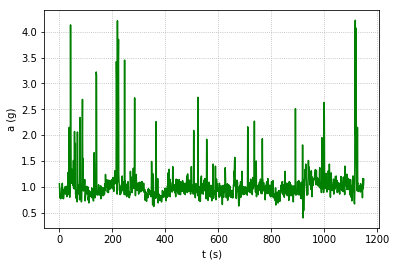

In [30]:
tMin=1450
tMax=2600
plt.plot(Acc[tMin:tMax],'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

In [31]:
print('Duración de la marcha: ',tMax-tMin,'s=',(tMax-tMin)/60,'s.')

Duración de la marcha:  1150 s= 19.166666666666668 s.


## Graficar las series de tiempo de todas las variables con fragmento de la marcha sombreada

Graficamos las series de tiempo de todas las variables con el fragmento de la marcha sombreado. 

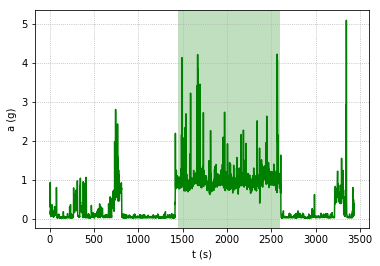

In [32]:
# Aceleración maximal (peak acceleration a)
# se mide en unidades del constante gravitacional g
# promedio de segundo, tu actividad, como no estamos moviendo
plt.plot(Acc,'g')
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

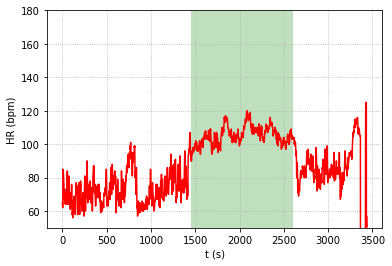

In [33]:
# Frecuencia cardiaca (heart rate HR)
# se mide en latidos por minuto (beats per minute bpm)
HR=Datos[:,0];
plt.plot(HR,'r')
plt.ylim(50,180)
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('HR (bpm)')
plt.show()

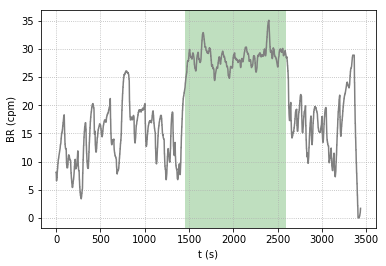

In [34]:
# Frecuencia respiratoria (breathing rate BR) 
# se mide a partir de los intervalos de tiempo entre 2 inspiraciones o expiraciones sucesivas
# se mide en ciclos por minuto (cycles per minute cpm)
BR=Datos[:,1];
plt.plot(BR,'grey')
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('BR (cpm)')
plt.show()

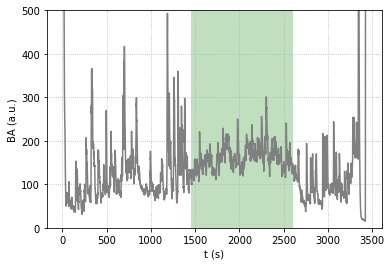

In [36]:
# La amplitud respiratoria (breathing ampltitude BA) se estima a partir del estira-afloja del cinturón
# BA se mide en unidades arbitrarias (arbitrary units a.u.)
BA=Datos[:,8];
plt.plot(BA,'grey')
plt.ylim(0,500)
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('BA (a.u.)')
plt.show()

## Datos originales "crudos" de acelerometría triaxial

In [13]:
Datos = np.loadtxt("2018_04_02-11_56_36_Accel JP.csv", delimiter=",",skiprows=1,usecols=range(1,4))
print(len(Datos))
print(Datos.shape)
print(Datos)

343700
(343700, 3)
[[1971. 2021. 2055.]
 [1966. 2022. 2054.]
 [1969. 2023. 2054.]
 ...
 [2015. 2119. 2022.]
 [2010. 2119. 2020.]
 [2012. 2116. 2019.]]


In [14]:
# Seleccionar fragmento de la caminata del archivo de resumen, tomando en cuenta que la frecuencia de muestreo aquí es 100x mayor
aZ=Datos[100*tMin:100*tMax,0] 
aY=Datos[100*tMin:100*tMax,1]
aX=Datos[100*tMin:100*tMax,2]
aZ=(aZ-2048)/83
aY=(aY-2048)/83
aX=(aX-2048)/83
a=np.sqrt(aX**2+aY**2+aZ**2)

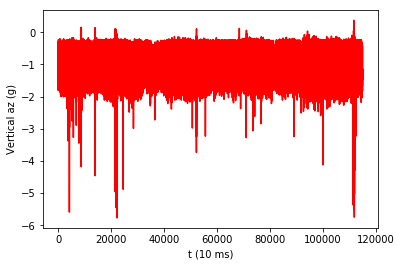

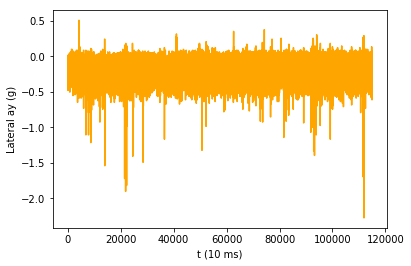

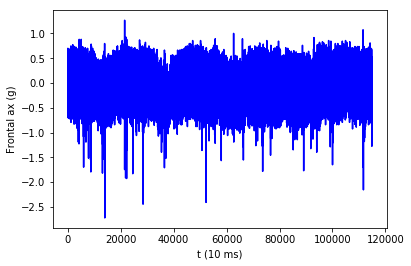

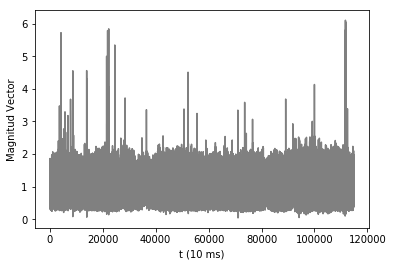

In [15]:
plt.clf()
plt.plot(aZ,'red')
plt.xlabel('t (10 ms)')
plt.ylabel('Vertical az (g)')
plt.show()
plt.plot(aY,'orange')
plt.xlabel('t (10 ms)')
plt.ylabel('Lateral ay (g)')
plt.show()
plt.plot(aX,'blue')
plt.xlabel('t (10 ms)')
plt.ylabel('Frontal ax (g)')
plt.show()
plt.plot(a,'grey')
plt.xlabel('t (10 ms)')
plt.ylabel('Magnitud Vector')
plt.show()

In [16]:
Datos = np.loadtxt("2018_04_04-11_58_12_Summary fer.csv", delimiter=",",skiprows=1,usecols=range(1,34))
print(len(Datos))
print(Datos.shape)
print(Datos)

3704
(3704, 33)
[[   65.      8.1 -3276.8 ...  6553.5   415.    419. ]
 [   65.      8.1 -3276.8 ...  6553.5   412.    419. ]
 [   65.      7.3 -3276.8 ...  6553.5   413.    420. ]
 ...
 [   83.      0.  -3276.8 ...    37.9   415.    419. ]
 [   90.      0.  -3276.8 ...    37.9   414.    418. ]
 [   93.      0.  -3276.8 ...    37.9   414.    419. ]]


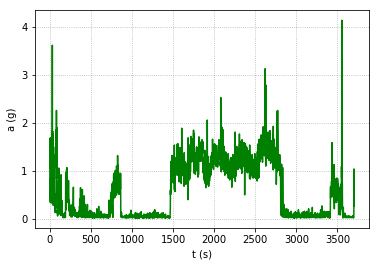

In [17]:
# Aceleración maximal (peak acceleration a)
# se mide en unidades del constante gravitacional g
Acc=Datos[:,5];
plt.plot(Acc,'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

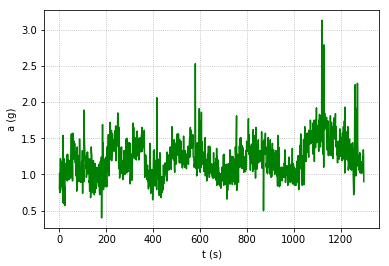

In [18]:
tMin=1500
tMax=2800
plt.plot(Acc[tMin:tMax],'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

In [19]:
print('Duración de la marcha: ',tMax-tMin,'s=',(tMax-tMin)/60,'s.')

Duración de la marcha:  1300 s= 21.666666666666668 s.


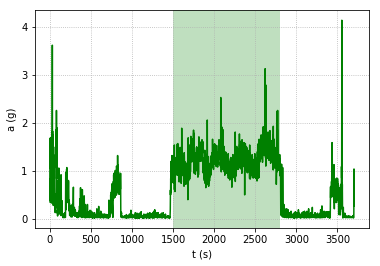

In [20]:
# Aceleración maximal (peak acceleration a)
# se mide en unidades del constante gravitacional g
# promedio de segundo, tu actividad, como no estamos moviendo
plt.plot(Acc,'g')
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

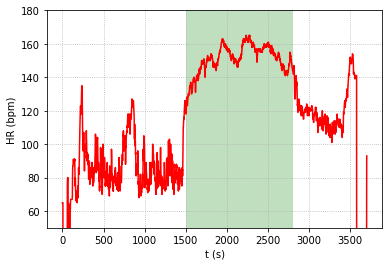

In [21]:
# Frecuencia cardiaca (heart rate HR)
# se mide en latidos por minuto (beats per minute bpm)
HR=Datos[:,0];
plt.plot(HR,'r')
plt.ylim(50,180)
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('HR (bpm)')
plt.show()

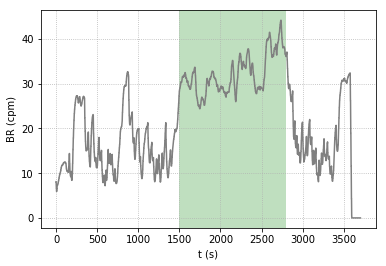

In [22]:
# Frecuencia respiratoria (breathing rate BR) 
# se mide a partir de los intervalos de tiempo entre 2 inspiraciones o expiraciones sucesivas
# se mide en ciclos por minuto (cycles per minute cpm)
BR=Datos[:,1];
plt.plot(BR,'grey')
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('BR (cpm)')
plt.show()

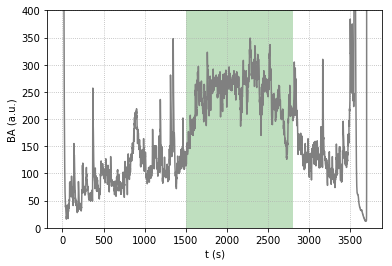

In [28]:
# La amplitud respiratoria (breathing ampltitude BA) se estima a partir del estira-afloja del cinturón
# BA se mide en unidades arbitrarias (arbitrary units a.u.)
BA=Datos[:,8];
plt.plot(BA,'grey')
plt.ylim(0,400)
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('BA (a.u.)')
plt.show()

## Datos originales "crudos" de acelerometría triaxial

In [29]:
Datos = np.loadtxt("2018_04_04-11_58_12_Accel fer.csv", delimiter=",",skiprows=1,usecols=range(1,4))
print(len(Datos))
print(Datos.shape)
print(Datos)

370400
(370400, 3)
[[2018. 2100. 2087.]
 [2029. 2101. 2071.]
 [2031. 2104. 2067.]
 ...
 [1998. 2102. 2010.]
 [1999. 2103. 2010.]
 [1998. 2102. 2008.]]


In [30]:
# Seleccionar fragmento de la caminata del archivo de resumen, tomando en cuenta que la frecuencia de muestreo aquí es 100x mayor
aZ=Datos[100*tMin:100*tMax,0] 
aY=Datos[100*tMin:100*tMax,1]
aX=Datos[100*tMin:100*tMax,2]
aZ=(aZ-2048)/83
aY=(aY-2048)/83
aX=(aX-2048)/83
a=np.sqrt(aX**2+aY**2+aZ**2)

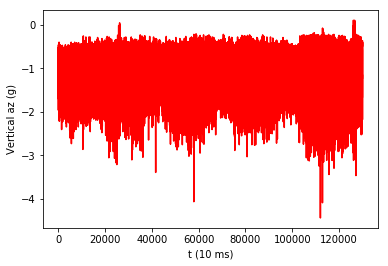

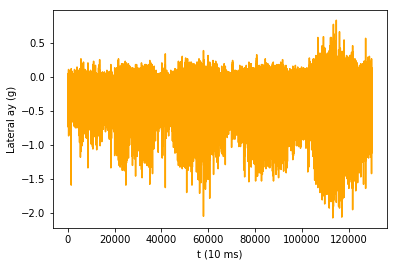

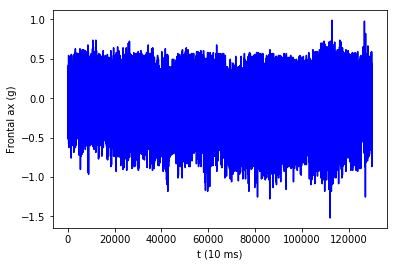

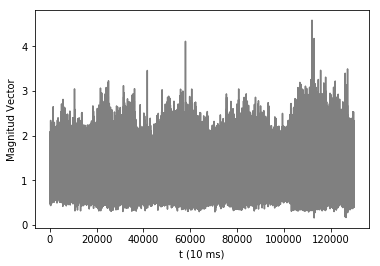

In [31]:
plt.clf()
plt.plot(aZ,'red')
plt.xlabel('t (10 ms)')
plt.ylabel('Vertical az (g)')
plt.show()
plt.plot(aY,'orange')
plt.xlabel('t (10 ms)')
plt.ylabel('Lateral ay (g)')
plt.show()
plt.plot(aX,'blue')
plt.xlabel('t (10 ms)')
plt.ylabel('Frontal ax (g)')
plt.show()
plt.plot(a,'grey')
plt.xlabel('t (10 ms)')
plt.ylabel('Magnitud Vector')
plt.show()

## Valentina

In [14]:
Datos = np.loadtxt("2018_04_11-09_45_44_Summary Val.csv", delimiter=",",skiprows=1,usecols=range(1,34))
print(len(Datos))
print(Datos.shape)
print(Datos)

2789
(2789, 33)
[[   65.      8.1 -3276.8 ...  6553.5   410.    410. ]
 [   65.      8.1 -3276.8 ...  6553.5   403.    416. ]
 [   65.      7.3 -3276.8 ...  6553.5   402.    409. ]
 ...
 [  116.     32.8 -3276.8 ...    37.9   414.    420. ]
 [  116.     32.8 -3276.8 ...    37.9   414.    419. ]
 [  116.     33.1 -3276.8 ...    37.9   414.    420. ]]


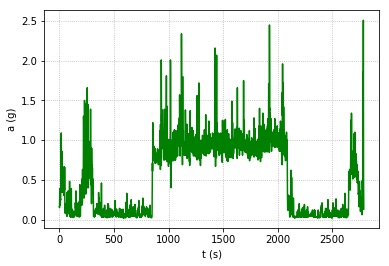

In [15]:
# Aceleración maximal (peak acceleration a)
# se mide en unidades del constante gravitacional g
Acc=Datos[:,5];
plt.plot(Acc,'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

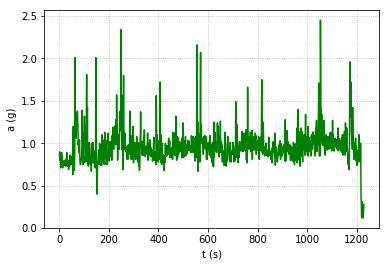

In [20]:
tMin=870
tMax=2100
plt.plot(Acc[tMin:tMax],'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

In [21]:
print('Duración de la marcha: ',tMax-tMin,'s=',(tMax-tMin)/60,'s.')

Duración de la marcha:  1230 s= 20.5 s.


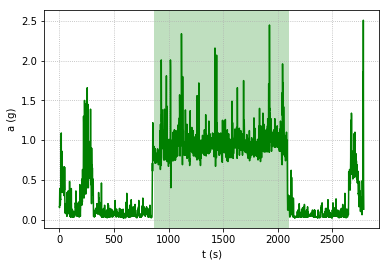

In [22]:
# Aceleración maximal (peak acceleration a)
# se mide en unidades del constante gravitacional g
# promedio de segundo, tu actividad, como no estamos moviendo
plt.plot(Acc,'g')
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

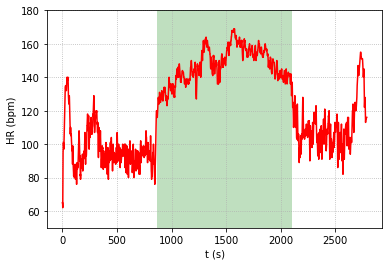

In [23]:
# Frecuencia cardiaca (heart rate HR)
# se mide en latidos por minuto (beats per minute bpm)
HR=Datos[:,0];
plt.plot(HR,'r')
plt.ylim(50,180)
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('HR (bpm)')
plt.show()

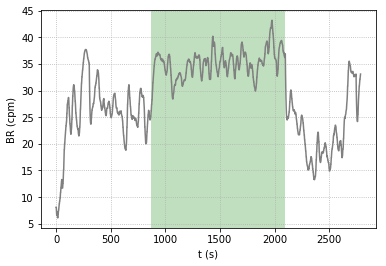

In [24]:
# Frecuencia respiratoria (breathing rate BR) 
# se mide a partir de los intervalos de tiempo entre 2 inspiraciones o expiraciones sucesivas
# se mide en ciclos por minuto (cycles per minute cpm)
BR=Datos[:,1];
plt.plot(BR,'grey')
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('BR (cpm)')
plt.show()

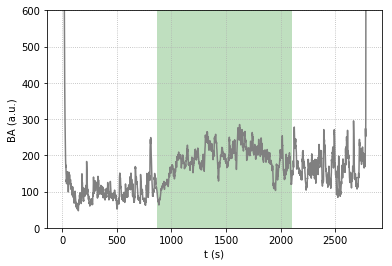

In [28]:
# La amplitud respiratoria (breathing ampltitude BA) se estima a partir del estira-afloja del cinturón
# BA se mide en unidades arbitrarias (arbitrary units a.u.)
BA=Datos[:,8];
plt.plot(BA,'grey')
plt.ylim(0,600)
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('BA (a.u.)')
plt.show()